In [70]:
import FinanceDataReader as fdr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas_datareader import data

In [71]:
# pandas reader로 데이터 가져오기
def getCloseDataPandas(ticker, start,end=None):
    print(ticker)
    return data.get_data_yahoo(ticker, start,end)['Close']

In [72]:
# financeDataReader로 데이터 가져오기
def getCloseDataFdr(ticker, start, end=None):
    print(ticker)
    return fdr.DataReader(ticker,start,end)['Close']

## SPY 주가 가져오기 https://finance.yahoo.com/quote/SPY/holdings/?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAAC6WFuY0Fseok4YN9wOkGjezP3qLT9qGhXP69GiiVECErR6zqZEwKvhZrG78I8OMnfqLEoa31okyVJZWz3mzomUcIAUAaDTf4PECCj52bctUiQLe6Zep4Z9_uJdnmbvPyqfhMB8qrzQ-75lp0d5hpxNPjv8pIV8GsmzfuprwSrHN



In [73]:
SPY = getCloseDataPandas("SPY","2020","2022-09-23")

SPY


In [74]:
#spy table
SPY

Date
2019-12-31    321.859985
2020-01-02    324.869995
2020-01-03    322.410004
2020-01-06    323.640015
2020-01-07    322.730011
                 ...    
2022-09-19    388.549988
2022-09-20    384.089996
2022-09-21    377.390015
2022-09-22    374.220001
2022-09-23    367.950012
Name: Close, Length: 689, dtype: float64

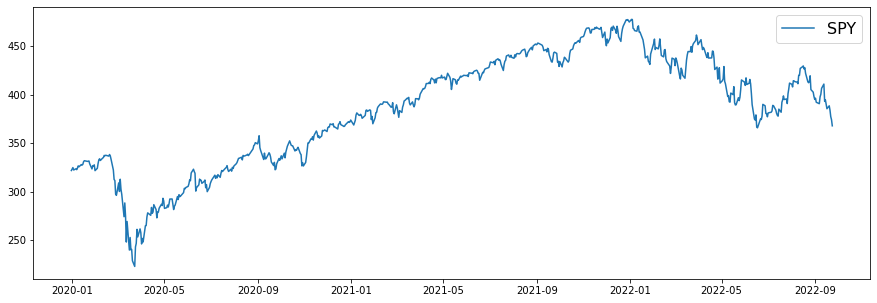

In [75]:
plt.figure(figsize=(15,5))
plt.plot(SPY, label="SPY")
plt.legend(fontsize = 16)

# 개별종목 일별수익률

1. getDayReturn
- 개별종목 일별 수익률
- 전날종가/오늘 종가
- closeDataSet : 종가 데이터
- return : 종가 데이터의 일별 수익률

In [76]:
def getDayReturn(closeDataSet):
    return (closeDataSet/closeDataSet.shift(1)).fillna(1)

In [77]:
DayReturn = getDayReturn(SPY)

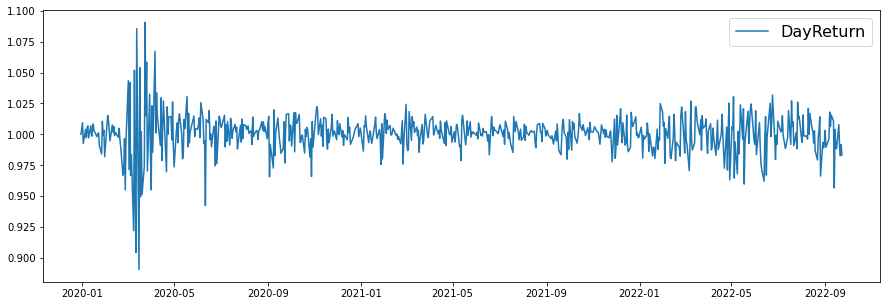

In [78]:
plt.figure(figsize=(15,5))
plt.plot(DayReturn, label="DayReturn")
plt.legend(fontsize = 16)

# 개별종목 누적수익률

1. getCumulativeReturn(closeDataSet)
- 개별 종목 누적 수익률 == 자산 흐름
- closeDataSet : 종가 데이터
- return : 종가 데이터 누적 수익률

In [79]:
def getCumulativeReturn(closeDataSet):
    return closeDataSet / closeDataSet.iloc[0]

In [80]:
CumulativeReturn = getCumulativeReturn(SPY)

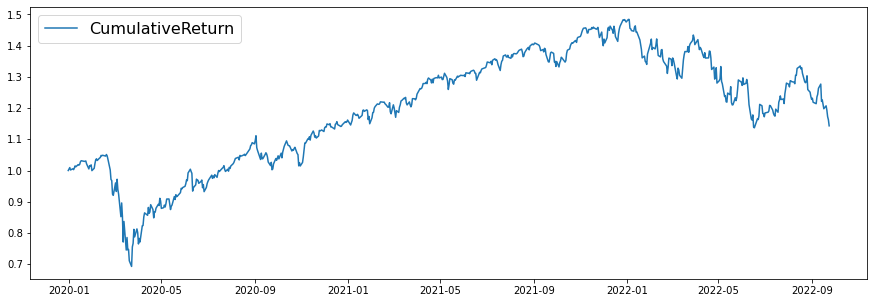

In [81]:
plt.figure(figsize=(15,5))
plt.plot(CumulativeReturn, label="CumulativeReturn")
plt.legend(fontsize = 16)

# 국내 장기 국채 ETF 가격
- 주식이 오르면 채권이 떨어지고 채권이 오르면 주식이 떨어진다
- 지금은 채권도 떨어지고 주식도 떨어지는 그래프를 확인 할 수 있음


In [82]:
# 10년 장기 국채
# pandas에는 데이터 없음
TIGER10Bond = getCloseDataFdr("302190", "2020", "2022-09-23")

302190


In [83]:
# table
TIGER10Bond

Date
2020-01-02    51385
2020-01-03    51619
2020-01-06    51672
2020-01-07    51478
2020-01-08    51400
              ...  
2022-09-19    47830
2022-09-20    47850
2022-09-21    47680
2022-09-22    47360
2022-09-23    47100
Name: Close, Length: 675, dtype: int64

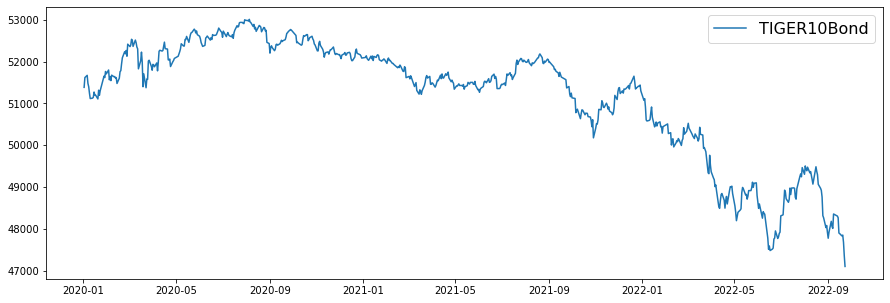

In [84]:
plt.figure(figsize=(15,5))
plt.plot(TIGER10Bond, label="TIGER10Bond")
plt.legend(fontsize = 16)

# SPY + 국내 장기 국채 ETF 종가
- spy 와 국내 국채를 섞음
- SPY, TIGER10Bond 모두 table

In [85]:
dataSet = pd.concat([SPY, TIGER10Bond], axis=1)
dataSet.columns=['SPY','TIGER10Bond']
dataSet.head(100)

,SPY,TIGER10Bond
Date,,
2019-12-31,321.859985,NaN
2020-01-02,324.869995,51385.0
2020-01-03,322.410004,51619.0
2020-01-06,323.640015,51672.0
2020-01-07,322.730011,51478.0
...,...,...
2020-05-13,281.600006,52530.0
2020-05-14,284.970001,52530.0
2020-05-15,286.279999,52604.0


# 포트폴리오 수익률

1. 포트폴리오 결과
- closeDataSet : 종가 데이터
- weight : 포트폴리오 개별자산 비중
- return : 포트폴리오 일간 수익률, 누적 수익률

- 50 : 50 으로 투자했을 때 return 값을 구함 ==> 30 : 70 으로 변경 가능
- 각각의 dayreturn 을 0.5를 곱하여 더함

In [86]:
def getPortfolioResult(closeDataSet, weight = None):
    dayReturn = getDayReturn(closeDataSet)
    cumulativeReturn = getCumulativeReturn(closeDataSet)
    if not weight:
        weight = [1/len(closeDataSet.columns)] * len(closeDataSet.columns)
        
    portfolioCumulativeReturn = (weight*cumulativeReturn).sum(axis=1)
    portfolioDayReturn = (portfolioCumulativeReturn/portfolioCumulativeReturn.shift(1)).fillna(1)
    
    return portfolioDayReturn, portfolioCumulativeReturn

In [87]:
# dataSet : SPY + TIGER10Bond
portDayReturn, portCumReturn= getPortfolioResult(dataSet)

In [88]:
portDayReturn

Date
2019-12-31    1.000000
2020-01-02    1.009352
2020-01-03    0.992428
2020-01-06    1.003815
2020-01-07    0.997188
                ...   
2022-09-19    1.007755
2022-09-20    0.988521
2022-09-21    0.982556
2022-09-22    0.991600
2022-09-23    0.983245
Length: 711, dtype: float64

In [89]:
portCumReturn

Date
2019-12-31    0.500000
2020-01-02    0.504676
2020-01-03    0.500854
2020-01-06    0.502765
2020-01-07    0.501352
                ...   
2022-09-19    0.603601
2022-09-20    0.596672
2022-09-21    0.586264
2022-09-22    0.581340
2022-09-23    0.571599
Length: 711, dtype: float64

# 포트폴리오 평가
1. getEvaluation
- cagr, dd, mdd
- 투자 성과 지표

In [90]:
def getEvaluation(cumulativeReturn):
    cagr = cumulativeReturn.iloc[-1] ** (252/len(cumulativeReturn))
    dd = (cumulativeReturn.cummax() - cumulativeReturn)/ cumulativeReturn.cummax()*100
    
    plt.figure(figsize=(15,5))
    plt.plot(-dd, label="DrawDown")
    plt.legend(fontsize = 16)
    mdd = dd.max()
    
    print(f"최종 수익률 : {cumulativeReturn.iloc[-1]}\ncagr: {cagr}\nmdd: {mdd}")
    return cagr,dd,mdd

최종 수익률 : 0.5715994981562019
cagr: 0.8201739441236551
mdd: 100.0


(0.8201739441236551,
 Date
 2019-12-31     0.000000
 2020-01-02     0.000000
 2020-01-03     0.757223
 2020-01-06     0.378607
 2020-01-07     0.658720
                 ...    
 2022-09-19    18.664044
 2022-09-20    19.597663
 2022-09-21    21.000184
 2022-09-22    21.663769
 2022-09-23    22.976279
 Length: 711, dtype: float64,
 100.0)

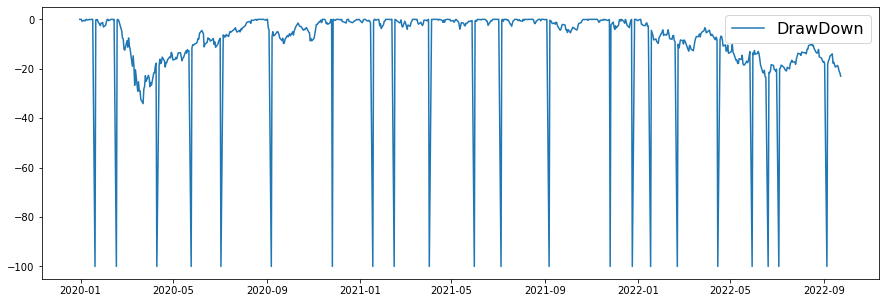

In [91]:
getEvaluation(portCumReturn)